# Простая линейная регрессия 
## (регрессия с одной независимой переменной)

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Первичный анализ данных 

In [35]:
data = pd.read_csv('weights_heights.csv', index_col='Index') #загрузка данных из .csv файла в датафрейм

In [36]:
data.head() #вывод первых 5-ти строк

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


Проверяем, что датасет корректно загрузился, также можно ознакомиться с признаками и их порядком.  


In [37]:
x = data["Weight"].tolist()
y = data["Height"].tolist()
n = len(data.index)

**Вывод: в данном датасете присутвуют только вещественные числа.  
Weight - независмый признак (вещественный)    
Height - целевая переменная (вещественный)**

Усложним задачу - добавим зависимый от обоих параметров вещественный призанак BMI - признак *Индекс массы тела* ([BMI](https://en.wikipedia.org/wiki/Body_mass_index))

In [38]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2 #Формула подсчета Индекса массы тела

In [39]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1) #Добавление признака BMI к датасету data

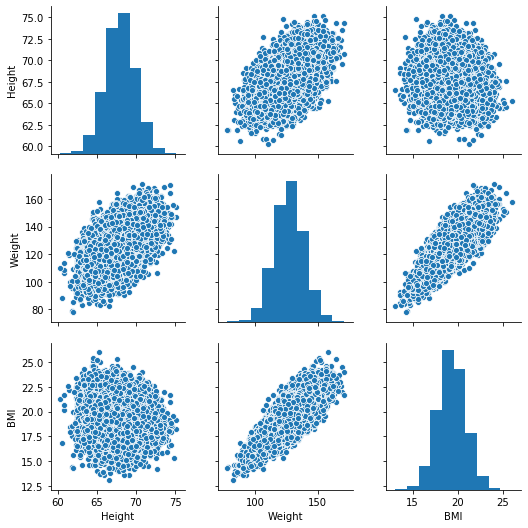

In [40]:
sns.pairplot(data)
plt.show() #Визуализация попарных зависимостей признаков (по диагонали гистограммы распределения признаков)

Предварительно (без применения статистических гипотез о нормальности распределния каждого из признаков и линейной зависимости) на графике наблюдается нормальное распределение каждого из признаков и линейная зависимость между признаками (Wight и BMI) и (Wight и Hight).

**Вывод: выполняются некоторая часть допущений к применению линейной регресии,а именно:  
а) Наблюдается линейная взаимосвязь независимых признаков и зависмой целевой переменной;  
б) Переменные распределены нормально.**

Еще усложним задачу и добавим новый **категориальный** признак weight_category, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях.  

In [41]:
def weight_category(weight):
    if weight < 120:
        return 1
    elif weight >= 150:
        return 3
    else:
        return 2 #Создание категорильного признака с 3 хначениями

In [42]:
data['weight_cat'] = data['Weight'].apply(weight_category) #Добавление признака weight_category к датасету data

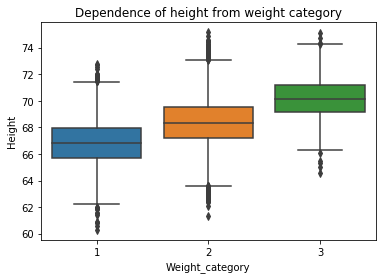

In [43]:
bplt = sns.boxplot(data=data, x="weight_cat", y='Height' )
bplt.set_xlabel("Weight_category")
bplt.set_ylabel("Height")
plt.title("Dependence of height from weight category")
plt.show() #Визуализация зависимости роста от весовой категории

## Применение функции линейной регресии

Задача: через облако точек, соответсвующих наблюдениям в наборе данных, в пространстве признаков "Рост" и "Вес" провести прямую линию так, чтобы минимизировать функционал (квадратичную ошибку).


$$ 
y_i = f(x) = {w_1}\cdot{x_i} + w_0
$$

In [44]:
def line(w_0, w_1, x):
    return w_0 + w_1*x  #Функция ленийной регрессии одной переменной

%time 

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.91 µs


 ## Минимизация квадратичной ошибки

Так как целевой признак -  **вещественный**, то задача восстановления регрессии решается минимизацией квадратичной функции ошибки:


$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
$n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных. 

In [45]:
def error(w):
    return np.sum((np.array(y) - w[0] - w[1]*np.array(x)) ** 2)  #Квадратичная ошибка

Посмотрм, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксирован.

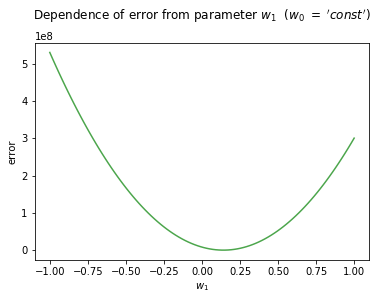

In [46]:
w_arr = np.linspace(-1, 1, 100)
w_0 = 50
plt.plot(w_arr, [error((w_0, i)) for i in w_arr], '-', color='green', alpha=0.7)
plt.title("Dependence of error from parameter $w_1$  ($w_0\ =\ 'const'$)\n")
plt.xlabel('$w_1$')
plt.ylabel('error')
plt.show()  #Визуализация зависимости ошибки от параметра w_1 при постоянном (фиксированном) w_0

Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. 

### Метод minimize_scalar 

In [47]:
from scipy.optimize import minimize_scalar 
def error_scalar(w_1):
    return error((w_0, w_1))
w_opt = minimize_scalar(error_mod, bracket=[-1, 1])
print(w_opt) #Минимизация функции ошибки методом minimize_scalar 

     fun: 79512.21728699499
    nfev: 9
     nit: 5
 success: True
       x: 0.1410920372883438


**Вывод: оптимальный весовой коэфициент w_1, минимизирующий ошибку квадратичной ошибки функции одной переменной совпал с графиком и равен  0.1410920372883438.**

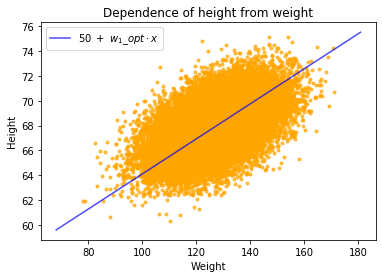

In [48]:
arr = np.linspace(np.amin(x) - 10, np.amax(x) + 10, 2)
plt.scatter(x, y, marker='.', color='orange', alpha=0.7)
plt.plot(arr, [line(w_0, w_opt.x, i) for i in arr], '-', color='blue', alpha=0.7, label='$50\ +\ w_{1}\_ opt\cdot x$')
plt.legend(loc='upper left')
plt.xlabel('Weight')
plt.ylabel("Height")
plt.title('Dependence of height from weight')
plt.show() #Визуализация графика функции линейной регресии, которая наилучшим образом аппроксимирует зависмость роста от веса

### Метод BFGS
BFGS - Итерационный метод численной оптимизации. Относится к классу так называемых квазиньютоновских методов. В отличие от ньютоновских методов в квазиньютоновских не вычисляется напрямую гессиан функции, т.е. нет необходимости находить частные производные второго порядка. Вместо этого гессиан вычисляется приближенно, исходя из сделанных до этого шагов.

L-BFGS (ограниченное использование памяти) — используется в случае большого количества неизвестных.
L-BFGS-B — модификация с ограниченным использованием памяти в многомерном кубе.

In [49]:
from scipy.optimize import minimize
w_opt = minimize(error, (0, 0), method="L-BFGS-B", bounds=((-100, 100), (-1, 1)))
print(w_opt.x)

[57.5717422   0.08200673]


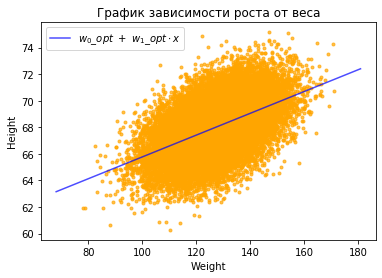

In [31]:
arr = np.linspace(np.amin(x) - 10, np.amax(x) + 10, 2)
plt.scatter(x, y, marker='.', color='orange', alpha=0.7)
plt.plot(arr, [line(w_opt.x[0], w_opt.x[1], i) for i in arr], '-', color='blue', alpha=0.7, 
         label='$w_{0}\_ opt\ +\ w_{1}\_ opt\cdot x$')
plt.legend(loc='upper left')
plt.title('Dependence of height from weight')
plt.xlabel('Weight')
plt.ylabel("Height")
plt.show()